# Proximal Policy Optimization (PPO)

<b> Requirements</b>

gymnasium==0.28.1
<br>stable_baselines3==2.0.0

In [7]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import math
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

### Create environment

In [8]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

### Instantiate the agent

In [9]:
model = PPO("MlpPolicy", env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Train the agent 

In [10]:
model.learn(total_timesteps=10000, progress_bar=True) 

Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | 22.6     |
| time/              |          |
|    fps             | 671      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28          |
|    ep_rew_mean          | 28          |
| time/                   |             |
|    fps                  | 445         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007925795 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00481    |
|    learning_rate        | 0.0003      |
|    loss                 | 6.56        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0164     |
|    value_loss           | 51.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 37.6        |
|    ep_rew_mean          | 37.6        |
| time/                   |             |
|    fps                  | 395         |
|    iterations           | 3           |
|    time_elapsed         | 15          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.010100277 |
|    clip_fraction        | 0.0648      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.666      |
|    explained_variance   | 0.089       |
|    learning_rate        | 0.0003      |
|    loss                 | 10.5        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0194     |
|    value_loss           | 37.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 47          |
|    ep_rew_mean          | 47          |
| time/                   |             |
|    fps                  | 373         |
|    iterations           | 4           |
|    time_elapsed         | 21          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.008422651 |
|    clip_fraction        | 0.0831      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.63       |
|    explained_variance   | 0.22        |
|    learning_rate        | 0.0003      |
|    loss                 | 20          |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 53          |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 61.8         |
|    ep_rew_mean          | 61.8         |
| time/                   |              |
|    fps                  | 362          |
|    iterations           | 5            |
|    time_elapsed         | 28           |
|    total_timesteps      | 10240        |
| train/                  |              |
|    approx_kl            | 0.0064375857 |
|    clip_fraction        | 0.051        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.61        |
|    explained_variance   | 0.245        |
|    learning_rate        | 0.0003       |
|    loss                 | 26.1         |
|    n_updates            | 40           |
|    policy_gradient_loss | -0.0141      |
|    value_loss           | 65.2         |
------------------------------------------


<b>Explanation of logger output</b>

rollout/
* ep_len_mean: Mean episode length
* ep_rew_mean: Mean episodic training reward

time/
* fps: Number of frames per seconds
* time_elapsed: Time in seconds since the beginning of training
* total_timesteps: Total number of timesteps (steps in the environments)

train/
* approx_kl: approximate mean KL divergence between old and new policy (for PPO), it is an estimation of how much changes happened in the update
* clip_fraction: mean fraction of surrogate loss that was clipped (above clip_range threshold) for PPO.
* clip_range: Current value of the clipping factor for the surrogate loss of PPO
* entropy_loss: Mean value of the entropy loss (negative of the average policy entropy)
* explained_variance: Fraction of the return variance explained by the value function
* learning_rate: Current learning rate value
* loss: Current total loss value
* n_updates: Number of gradient updates applied so far
* policy_gradient_loss: Current value of the policy gradient loss (its value does not have much meaning)
* value_loss: Current value for the value function loss for on-policy algorithms

### Test the trained agent and visualize the environment

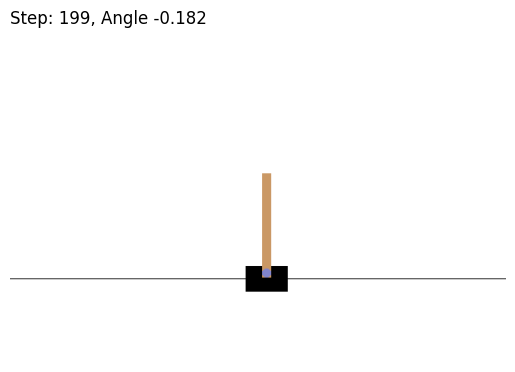

<Figure size 640x480 with 0 Axes>

In [11]:
images = []
ims = []
fig = plt.figure()
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
vec_env = model.get_env()
obs = vec_env.reset()
for i in range(200):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    state_img = vec_env.render("rgb_array")
    fig = plt.figure()
    plt.imshow(state_img)
    plt.title("Step: %d, Angle %.3f" % (i, obs[0][2]*180 / math.pi),loc="left")
    plt.axis('off')
    display(fig)
    images.append(fig)
    clear_output(wait=True)  # Clear the output for the next image

    plt.close()

display(fig)

### Create and save animated environment 

In [12]:
import imageio
import imageio.v2
import os

os.makedirs('figures', exist_ok=True)
for i, fig in enumerate(images):
    fig.savefig(f'figures/fig{i}.png')

    images= []

for i in range(200):
    images.append(imageio.imread(f'figures/fig{i}.png'))

imageio.mimsave('figures/movie.gif', images, 'GIF', duration = 0.1)  # 0.5 is the duration for each frame
clear_output()

c:\Users\Alaa\.conda\envs\pygeometric\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  if sys.path[0] == "":
